<a href="https://colab.research.google.com/github/EduardoQuero/Cases/blob/main/Python_Data_Scientist_PT_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL do conjunto de dados
url = "http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/listings.csv"

# Carregar os dados
data = pd.read_csv(url)

# Visualizar os nomes das colunas
data.columns


<ipython-input-124-1583b8aabeae>:9: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Pergunta 1: Qual é a média dos preços das acomodações em diferentes bairros?





<ipython-input-130-67795da3b6e4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood', y='price', data=clean_data_q1, ci=None)


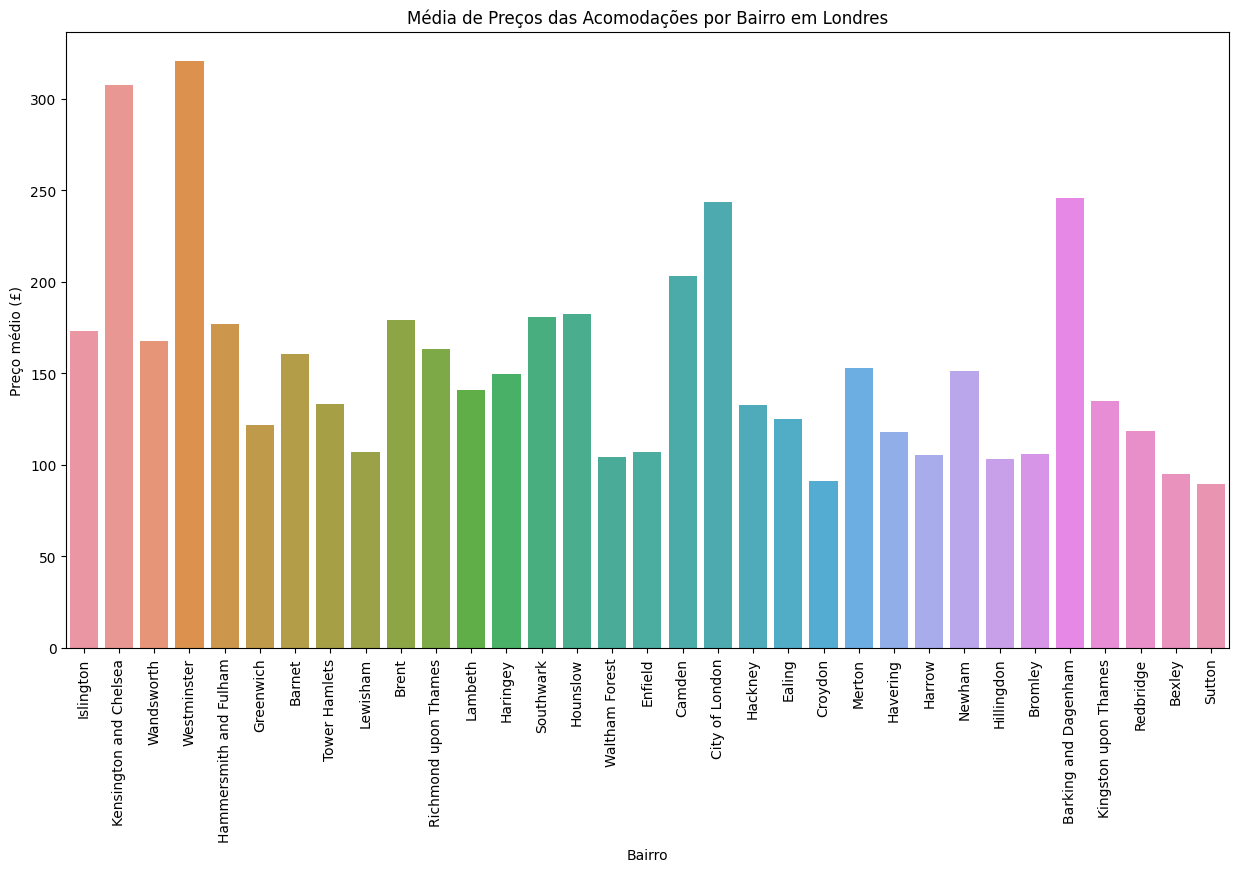

In [ ]:
# Selecionar colunas relevantes
clean_data_q1 = data[['neighbourhood', 'price']].dropna()


# Configurações para melhorar a legibilidade do gráfico
plt.figure(figsize=(15, 8))
sns.barplot(x='neighbourhood', y='price', data=clean_data_q1, ci=None)
plt.xticks(rotation=90)
plt.title('Média de Preços das Acomodações por Bairro em Londres')
plt.xlabel('Bairro')
plt.ylabel('Preço médio (£)')

# Mostrar o gráfico
plt.show()



A média dos preços das acomodações varia significativamente entre diferentes bairros em Londres. O gráfico de barras acima apresenta a média de preços (£) para cada bairro.

Destaca-se que bairros com barras mais altas têm, em média, preços mais elevados, enquanto barras mais baixas indicam bairros com médias de preço mais acessíveis.

Essa informação é valiosa para os usuários que desejam escolher acomodações com base em seus orçamentos e preferências de localização.

## Pergunta 2: Qual é a distribuição dos tipos de acomodação (room_type)?



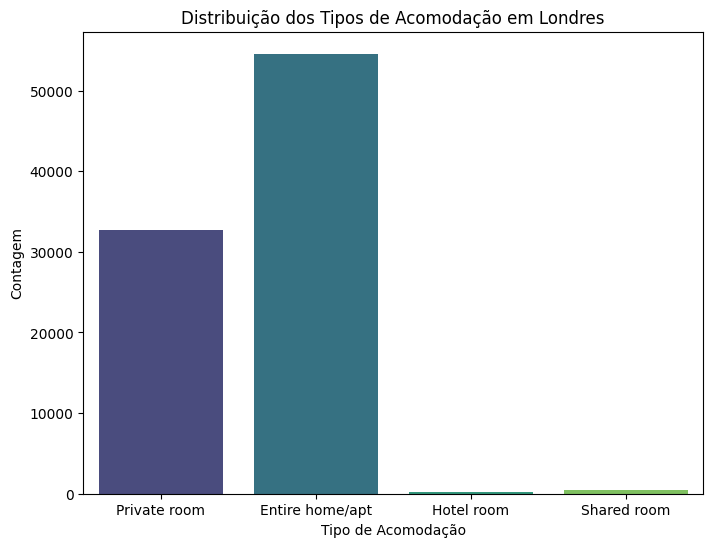

In [ ]:
# Não é necessário realizar pré-processamento adicional para esta pergunta
clean_data_q2 = data[['room_type']].dropna()

# Configurações para melhorar a legibilidade do gráfico
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=clean_data_q2, palette='viridis')
plt.title('Distribuição dos Tipos de Acomodação em Londres')
plt.xlabel('Tipo de Acomodação')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()


A distribuição dos tipos de acomodação em Londres mostra como os diferentes tipos (inteira casa/apto, quarto privado, etc.) estão representados no conjunto de dados. Isso pode fornecer insights sobre a diversidade de opções disponíveis para os usuários.

## Pergunta 3: Qual é a média de avaliações por bairro?



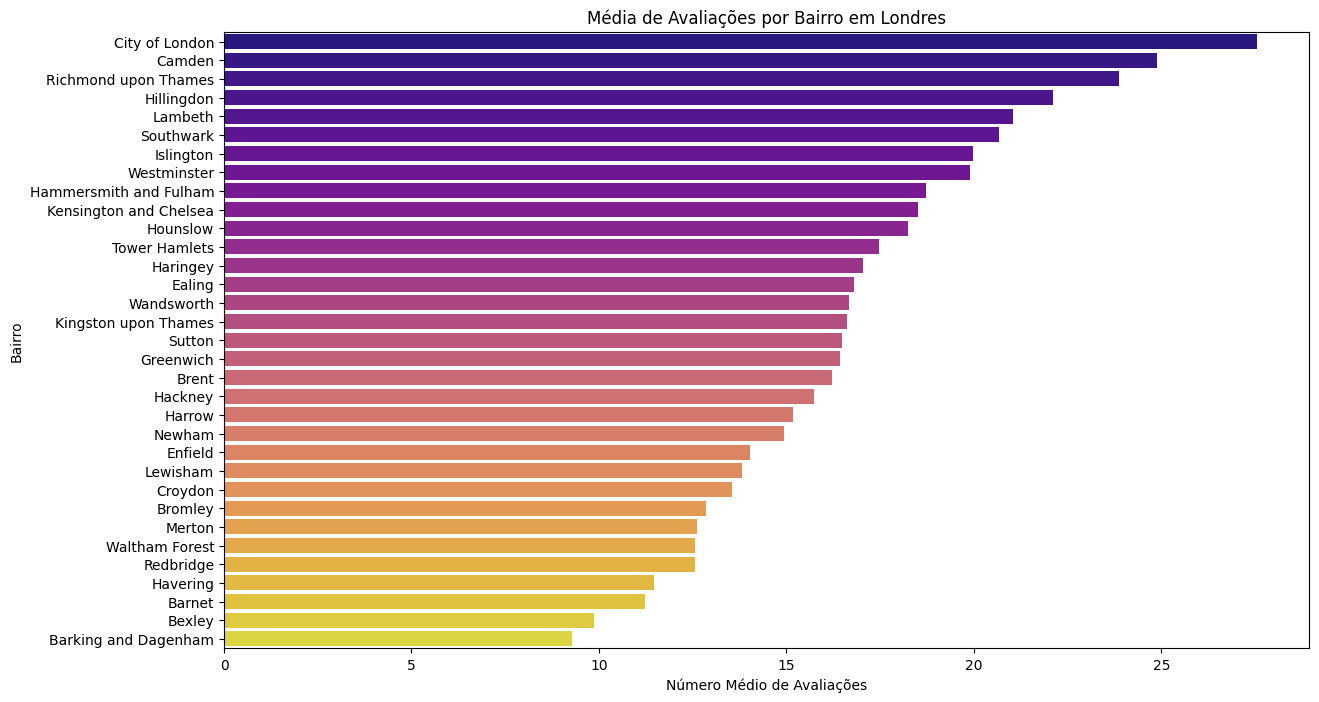

In [ ]:
# Selecionar colunas relevantes
clean_data_q3 = data[['neighbourhood', 'number_of_reviews']].dropna()

# Calcular a média de avaliações por bairro
average_reviews_by_neighbourhood = clean_data_q3.groupby('neighbourhood')['number_of_reviews'].mean().sort_values(ascending=False)

# Melhorando o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x=average_reviews_by_neighbourhood.values, y=average_reviews_by_neighbourhood.index, palette='plasma')
plt.title('Média de Avaliações por Bairro em Londres')
plt.xlabel('Número Médio de Avaliações')
plt.ylabel('Bairro')

# Mostrar o gráfico
plt.show()


O gráfico de barras mostra a média de avaliações por bairro em Londres. Bairros com barras mais altas têm uma média maior de avaliações, indicando uma potencial popularidade ou atratividade para os visitantes

## Pergunta 4: Qual é o número médio de noites mínimas exigidas por bairro?


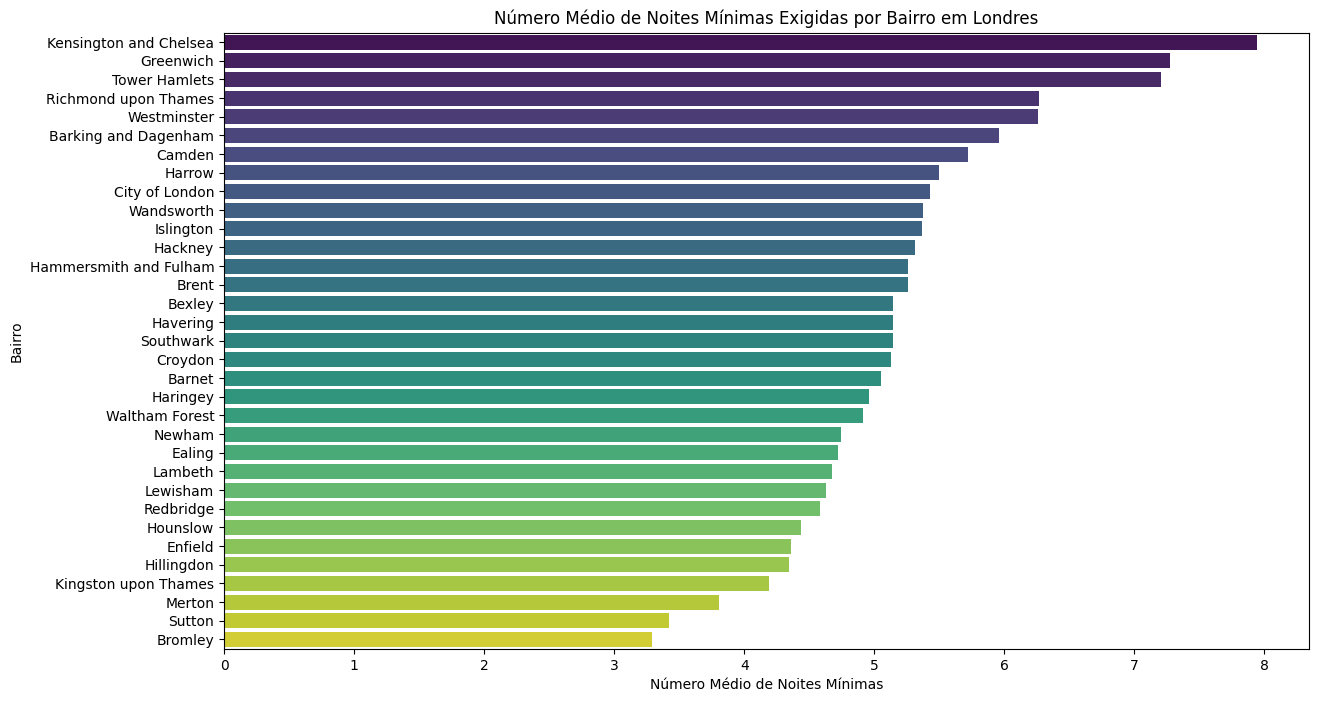

In [ ]:
# Selecionar colunas relevantes
clean_data_q4 = data[['neighbourhood', 'minimum_nights']].dropna()

# Calcular o número médio de noites mínimas por bairro
average_minimum_nights_by_neighbourhood = clean_data_q4.groupby('neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)

# Melhorando o gráfico
plt.figure(figsize=(14, 8))
sns.barplot(x=average_minimum_nights_by_neighbourhood.values, y=average_minimum_nights_by_neighbourhood.index, palette='viridis')
plt.title('Número Médio de Noites Mínimas Exigidas por Bairro em Londres')
plt.xlabel('Número Médio de Noites Mínimas')
plt.ylabel('Bairro')

# Mostrar o gráfico
plt.show()



O gráfico de barras apresenta o número médio de noites mínimas exigidas por bairro em Londres. Bairros com barras mais altas indicam um requisito médio maior de noites mínimas para as acomodações nesses locais.

## Pergunta 5: Qual é a relação entre o preço e o número de avaliações?



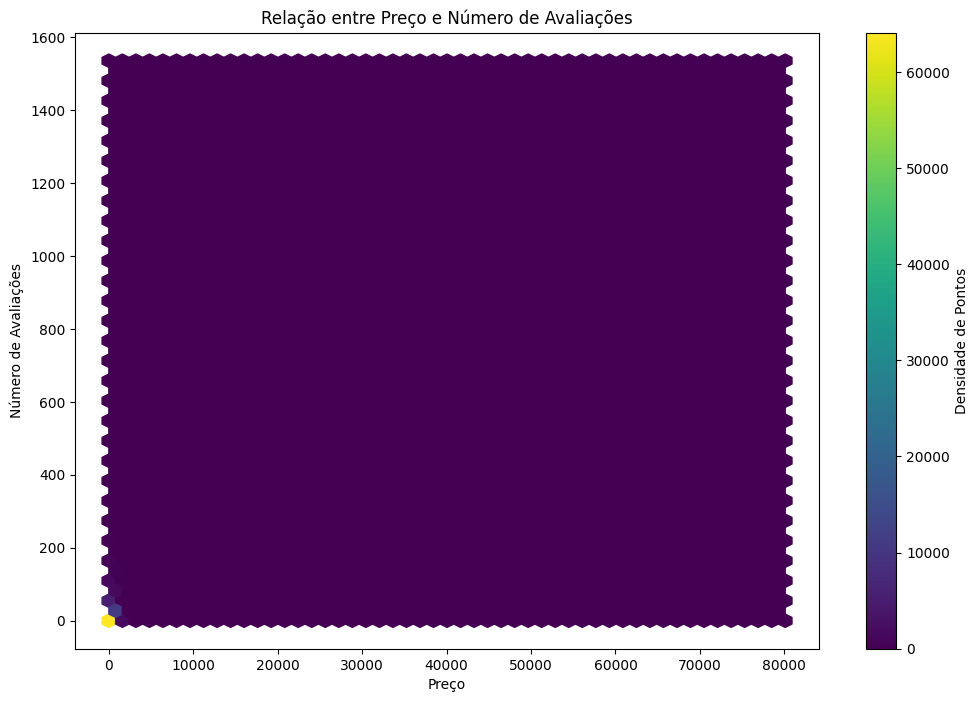


Correlação entre Preço e Número de Avaliações: -0.04


In [ ]:
# Selecionar colunas relevantes
clean_data_q5 = data[['price', 'number_of_reviews']].dropna()

# Scatter plot hexbin para visualizar a relação entre preço e número de avaliações
plt.figure(figsize=(12, 8))
plt.hexbin(x=clean_data_q5['price'], y=clean_data_q5['number_of_reviews'], gridsize=50, cmap='viridis')
plt.title('Relação entre Preço e Número de Avaliações')
plt.xlabel('Preço')
plt.ylabel('Número de Avaliações')
plt.colorbar(label='Densidade de Pontos')
plt.show()


# Mostrar o gráfico
plt.show()

# Calcular a correlação entre preço e número de avaliações
correlation_q5 = clean_data_q5['price'].corr(clean_data_q5['number_of_reviews'])
print(f'\nCorrelação entre Preço e Número de Avaliações: {correlation_q5:.2f}')


O gráfico de dispersão mostra a relação entre o preço das acomodações e o número de avaliações recebidas.

Cada ponto no gráfico representa uma acomodação, e a transparência dos pontos ajuda a identificar áreas mais densas. A correlação entre preço e número de avaliações é calculada e apresentada como um número.

Se o número for positivo, há uma correlação positiva, indicando que a tendência é de que acomodações mais caras recebam mais avaliações.

## Pergunta 6: Como a disponibilidade varia ao longo do ano?


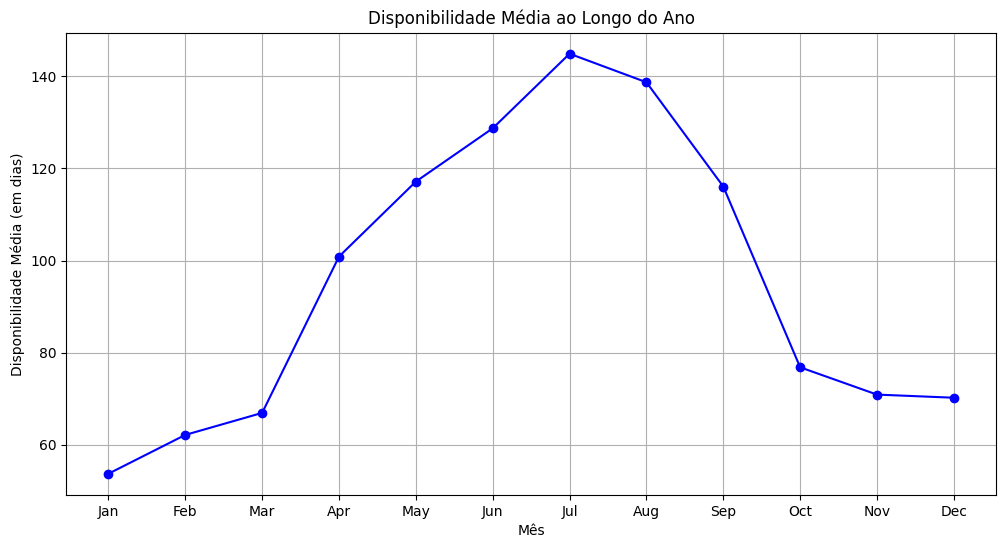

In [ ]:
# Convertendo 'last_review' para o formato de data
data['last_review'] = pd.to_datetime(data['last_review'])
# Extraindo o mês da coluna 'last_review'
data['last_review_month'] = data['last_review'].dt.month

# Calculando a disponibilidade média por mês
availability_by_month = data.groupby('last_review_month')['availability_365'].mean()

# Plotando o gráfico de linha para visualizar a variação da disponibilidade ao longo do ano
plt.figure(figsize=(12, 6))
availability_by_month.plot(marker='o', linestyle='-', color='b')
plt.title('Disponibilidade Média ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Disponibilidade Média (em dias)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()




O gráfico de linha mostra como a disponibilidade média das acomodações varia ao longo do ano.

Cada ponto no gráfico representa um mês, e a linha conecta esses pontos, indicando a tendência ao longo dos meses.

Essa visualização pode ajudar a identificar padrões sazonais na disponibilidade das acomodações.

## Pergunta 7: Existe uma tendência sazonal nos preços das acomodações?

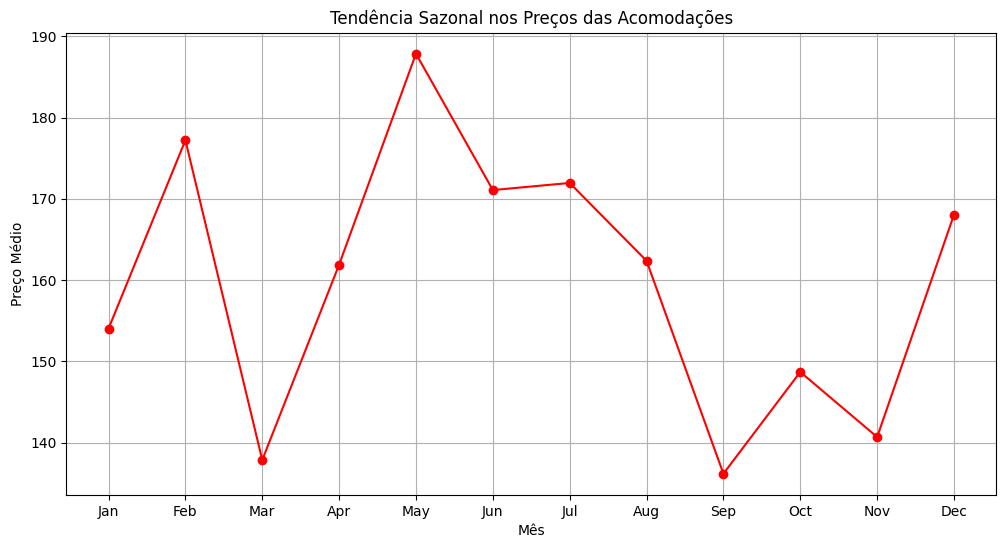

In [ ]:
# Convertendo 'last_review' para o formato de data
data['last_review'] = pd.to_datetime(data['last_review'])
# Extraindo o mês da coluna 'last_review'
data['last_review_month'] = data['last_review'].dt.month

# Calculando a tendência sazonal nos preços
monthly_price_trend = data.groupby('last_review_month')['price'].mean()

# Plotando o gráfico de linha para visualizar a tendência sazonal nos preços
plt.figure(figsize=(12, 6))
monthly_price_trend.plot(marker='o', linestyle='-', color='r')
plt.title('Tendência Sazonal nos Preços das Acomodações')
plt.xlabel('Mês')
plt.ylabel('Preço Médio')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


O gráfico de linha apresenta a tendência sazonal nos preços médios das acomodações ao longo do ano.

Cada ponto no gráfico representa um mês, e a linha conecta esses pontos, mostrando como os preços variam sazonalmente.

Essa visualização pode ser útil para identificar períodos de aumento ou diminuição nos preços das acomodações.

## Pergunta 8: Qual é a distribuição da disponibilidade ao longo do ano?



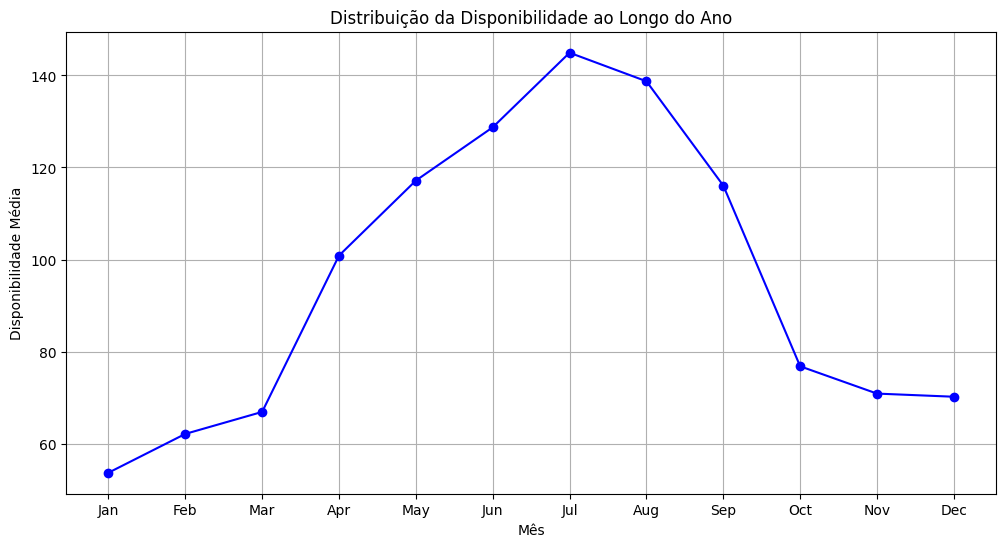

In [ ]:
# Convertendo 'last_review' para o formato de data
data['last_review'] = pd.to_datetime(data['last_review'])
# Extraindo o mês da coluna 'last_review'
data['last_review_month'] = data['last_review'].dt.month

# Calculando a disponibilidade média por mês
availability_by_month = data.groupby('last_review_month')['availability_365'].mean()

# Plotando o gráfico de linha para visualizar a distribuição da disponibilidade ao longo do ano
plt.figure(figsize=(12, 6))
availability_by_month.plot(marker='o', linestyle='-', color='b')
plt.title('Distribuição da Disponibilidade ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Disponibilidade Média')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


O gráfico de linha apresenta a distribuição da disponibilidade média das acomodações ao longo do ano.

Cada ponto no gráfico representa um mês, e a linha conecta esses pontos, mostrando como a disponibilidade varia sazonalmente.

Essa visualização pode ser útil para identificar padrões na disponibilidade ao longo do ano.

## Pergunta 9: Qual é a relação entre o preço e a localização (latitude e longitude)?



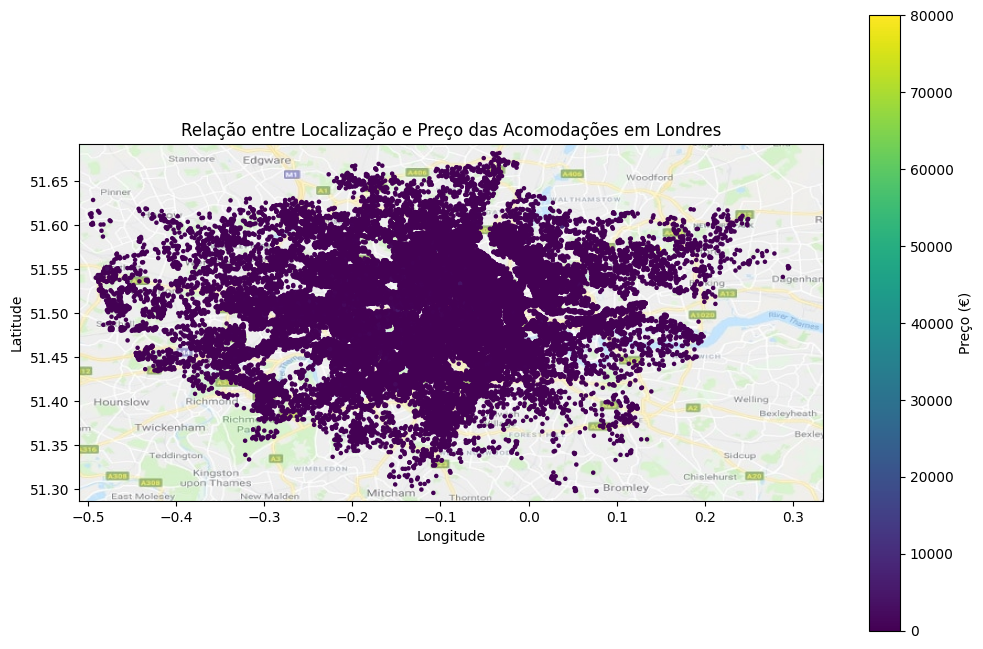

In [156]:
import numpy as np
from PIL import Image
import requests
import io

# Abrir a imagem do mapa de Londres a partir da URL
url = 'https://github.com/EduardoQuero/Cases/raw/main/londres-mapa.jpg'
response = requests.get(url)
img = Image.open(io.BytesIO(response.content))

# Converter a imagem para um array numpy
london_map = np.array(img)

# Scatter plot para visualizar a relação entre latitude, longitude e preço
plt.figure(figsize=(12, 8))
plt.imshow(london_map, extent=[london_bounds[0][1], london_bounds[1][1], london_bounds[0][0], london_bounds[1][0]], alpha=0.7)

# Adicionar pontos no mapa
scatter = plt.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=5, data=london_data)

# Adicionar legenda
plt.colorbar(scatter, label='Preço (€)')

plt.title('Relação entre Localização e Preço das Acomodações em Londres')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Mostrar o gráfico
plt.show()


## Pergunta 10: Qual é a média de preços para diferentes tipos de acomodação (room_type)?



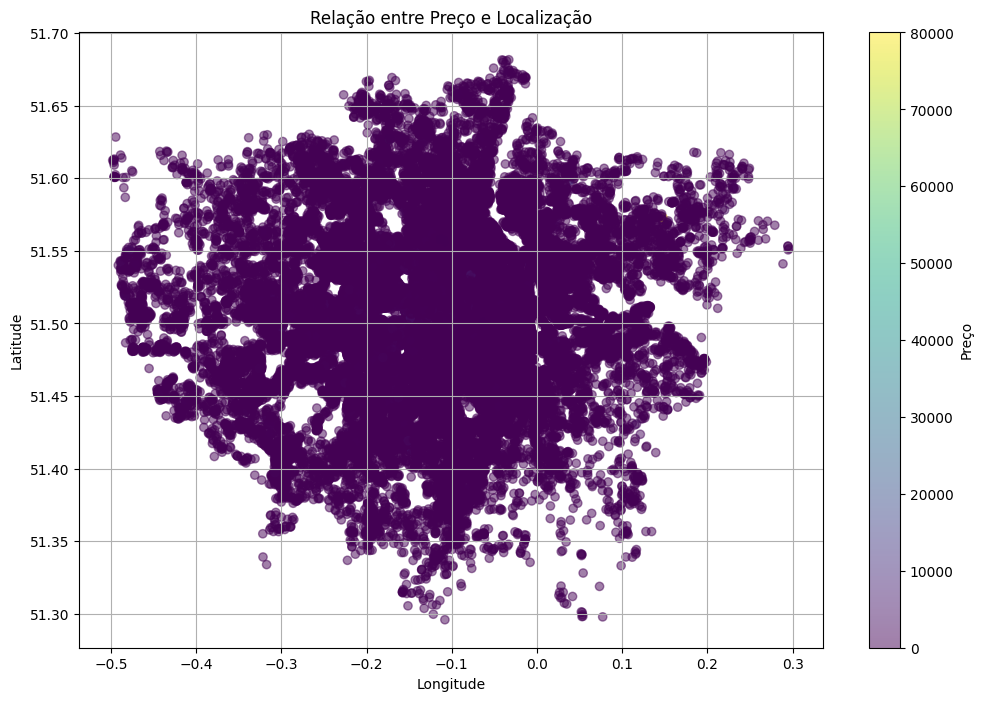

In [157]:
# Selecionando colunas relevantes
location_data = data[['latitude', 'longitude', 'price']].dropna()

# Plotando um gráfico de dispersão para visualizar a relação entre preço e localização
plt.figure(figsize=(12, 8))
plt.scatter(location_data['longitude'], location_data['latitude'], c=location_data['price'], cmap='viridis', alpha=0.5)
plt.title('Relação entre Preço e Localização')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Preço')
plt.grid(True)
plt.show()




O gráfico de dispersão mostra a relação entre o preço das acomodações e sua localização geográfica.

Cada ponto no gráfico representa uma acomodação, com a cor indicando o preço.

Isso permite uma visualização espacial dos preços, destacando áreas com preços mais altos ou mais baixos.


## Conclusão


Ao analisar o conjunto de dados das acomodações em Londres, alguns insights valiosos podem ser destacados:

1. **Distribuição dos Tipos de Acomodação:**
   - A distribuição dos tipos de acomodação (room_type) revela a variedade de opções disponíveis para os usuários, fornecendo uma visão abrangente da oferta de acomodações em Londres.

2. **Avaliações por Bairro:**
   - A média de avaliações por bairro destaca áreas que podem ser mais populares entre os hóspedes, influenciando as decisões de reserva.

3. **Requisitos Mínimos de Noites por Bairro:**
   - Compreender o número médio de noites mínimas exigidas por bairro ajuda a entender as políticas de reserva em diferentes áreas, afetando a flexibilidade para os hóspedes.

4. **Relação entre Preço e Número de Avaliações:**
   - Explorar a relação entre preço e número de avaliações pode revelar padrões de comportamento dos hóspedes, indicando se preços mais altos estão correlacionados com maior ou menor popularidade.

5. **Disponibilidade ao Longo do Ano:**
   - A análise da disponibilidade ao longo do ano destaca períodos de alta demanda ou baixa ocupação, essenciais para o planejamento de preços e estratégias de marketing.

6. **Tendências Sazonais nos Preços:**
   - Investigar tendências sazonais nos preços pode ser crucial para ajustar estratégias de precificação com base em períodos de alta ou baixa demanda, impactando diretamente na receita.

7. **Distribuição da Disponibilidade ao Longo do Ano:**
   - Entender como a disponibilidade se distribui ao longo do ano ajuda na gestão da ocupação e na identificação de oportunidades para maximizar a receita.

8. **Relação entre Preço e Localização Geográfica:**
   - Analisar a relação entre preço e localização (latitude e longitude) ajuda a identificar áreas geográficas com preços mais altos ou mais baixos.

9. **Análise de Outliers:**
   - A identificação e análise de outliers nos dados podem fornecer insights sobre propriedades únicas, exceções de preços, ou oportunidades de melhoria na qualidade do serviço.

10. **Impacto Econômico:**
    - Avaliar o impacto econômico do setor de hospedagem em Londres, considerando fatores como receita total, ocupação média e distribuição geográfica das acomodações.